Choose regression algorithm (linear/polynomial): polynomial


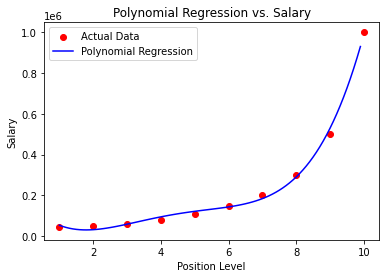

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Strategy Pattern: Define the regression strategy interface
class RegressionStrategy:
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass

# Concrete Strategy: Linear Regression
class LinearRegressionStrategy(RegressionStrategy):
    def __init__(self):
        self.model = LinearRegression()
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)

# Concrete Strategy: Polynomial Regression
class PolynomialRegressionStrategy(RegressionStrategy):
    def __init__(self, degree):
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)
        self.model = LinearRegression()
    
    def fit(self, X, y):
        X_poly = self.poly_features.fit_transform(X)
        self.model.fit(X_poly, y)
    
    def predict(self, X):
        X_poly = self.poly_features.transform(X)
        return self.model.predict(X_poly)

# Context: Regression Model
class RegressionModel:
    def __init__(self, strategy):
        self.strategy = strategy
    
    def fit(self, X, y):
        self.strategy.fit(X, y)
    
    def predict(self, X):
        return self.strategy.predict(X)

# Load the dataset
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

# Create regression models using different strategies
linear_reg = RegressionModel(LinearRegressionStrategy())
polynomial_reg = RegressionModel(PolynomialRegressionStrategy(degree=4))

# Fit the models
linear_reg.fit(X, y)
polynomial_reg.fit(X, y)

# User chooses the regression algorithm
algorithm_choice = input("Choose regression algorithm (linear/polynomial): ").lower()

if algorithm_choice == 'linear':
    model = linear_reg
    label = 'Linear Regression'
elif algorithm_choice == 'polynomial':
    model = polynomial_reg
    label = 'Polynomial Regression'
else:
    print("Invalid choice. Using Linear Regression as default.")
    model = linear_reg
    label = 'Linear Regression'

# Make predictions
X_pred = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Plot the results
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_pred, y_pred, color='blue', label=label)
plt.title(f'{label} vs. Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

Choose regression algorithm (linear/polynomial): linear


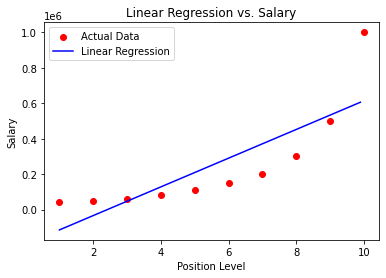

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Strategy Pattern: Define the regression strategy interface
class RegressionStrategy:
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass

# Concrete Strategy: Linear Regression
class LinearRegressionStrategy(RegressionStrategy):
    def __init__(self):
        self.model = LinearRegression()
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)

# Concrete Strategy: Polynomial Regression
class PolynomialRegressionStrategy(RegressionStrategy):
    def __init__(self, degree):
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)
        self.model = LinearRegression()
    
    def fit(self, X, y):
        X_poly = self.poly_features.fit_transform(X)
        self.model.fit(X_poly, y)
    
    def predict(self, X):
        X_poly = self.poly_features.transform(X)
        return self.model.predict(X_poly)

# Context: Regression Model
class RegressionModel:
    def __init__(self, strategy):
        self.strategy = strategy
    
    def fit(self, X, y):
        self.strategy.fit(X, y)
    
    def predict(self, X):
        return self.strategy.predict(X)

# Load the dataset
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

# Create regression models using different strategies
linear_reg = RegressionModel(LinearRegressionStrategy())
polynomial_reg = RegressionModel(PolynomialRegressionStrategy(degree=4))

# Fit the models
linear_reg.fit(X, y)
polynomial_reg.fit(X, y)

# User chooses the regression algorithm
algorithm_choice = input("Choose regression algorithm (linear/polynomial): ").lower()

if algorithm_choice == 'linear':
    model = linear_reg
    label = 'Linear Regression'
elif algorithm_choice == 'polynomial':
    model = polynomial_reg
    label = 'Polynomial Regression'
else:
    print("Invalid choice. Using Linear Regression as default.")
    model = linear_reg
    label = 'Linear Regression'

# Make predictions
X_pred = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Plot the results
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_pred, y_pred, color='blue', label=label)
plt.title(f'{label} vs. Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()